# Solving TSP for benchmarking 

In [1]:
# Lazy importing 
import sys 
sys.path.append('..')

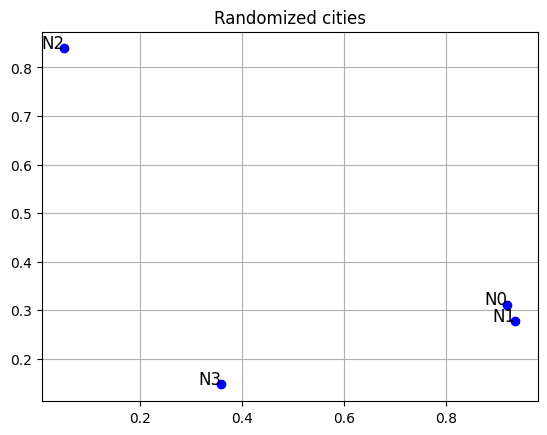

In [2]:
from utils import TSP 
from amplify import solve

# setting up the TSP problem 
tsp = TSP(4, initial_plot=True)

qp = tsp.qubo(format="amplify")
model = qp["model"]

## Brute Force

Tour:  (0, 1, 2, 3) Cost:  22


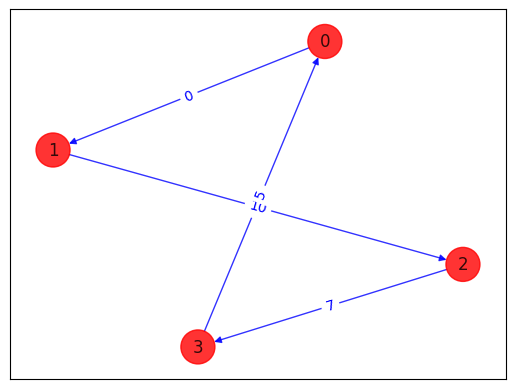

In [3]:
tour, cost = tsp.brute_force()
tsp.draw_tour(tour)

print("Tour: ", tour, "Cost: ", cost)

## Fixstars Amplify AE

In [4]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
result = solve(model, clientFS)

print(result.best.objective)
print(result.best.values)

tsp.interpret(result)

22.0
{q_{0,0}: 0, q_{0,1}: 1, q_{0,2}: 0, q_{0,3}: 0, q_{1,0}: 1, q_{1,1}: 0, q_{1,2}: 0, q_{1,3}: 0, q_{2,0}: 0, q_{2,1}: 0, q_{2,2}: 0, q_{2,3}: 1, q_{3,0}: 0, q_{3,1}: 0, q_{3,2}: 1, q_{3,3}: 0}
[1. 0. 3. 2.]


In [5]:
# from Utils.solvers import GetGurobiClient



# clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
# resultG = solve(model, clientG)

# print(resultG.best.objective)
# print(resultG.best.values)

## D-Wave

In [6]:
from Utils.solvers import GetDWaveClient

clientDWave = GetDWaveClient()

result = solve(model, clientDWave)

print(result.best.objective)
print(result.best.values)

22.0
{q_{0,0}: 0, q_{0,1}: 0, q_{0,2}: 0, q_{0,3}: 1, q_{1,0}: 0, q_{1,1}: 0, q_{1,2}: 1, q_{1,3}: 0, q_{2,0}: 0, q_{2,1}: 1, q_{2,2}: 0, q_{2,3}: 0, q_{3,0}: 1, q_{3,1}: 0, q_{3,2}: 0, q_{3,3}: 0}


In [7]:
tsp.interpret(result)

array([3., 2., 1., 0.])